In [7]:
a=5
b=4
print(a+b)

9


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('data/stud.csv')

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
race_uniques=np.unique(df['race_ethnicity'])
print(race_uniques)
ge=np.unique(df['gender'])
print(ge)
pa=np.unique(df['parental_level_of_education'])
print(pa)
lu=np.unique(df['lunch'])
print(lu)
tp=np.unique(df['test_preparation_course'])
print(tp)
df.nunique()

['group A' 'group B' 'group C' 'group D' 'group E']
['female' 'male']
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
['free/reduced' 'standard']
['completed' 'none']


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.shape

(1000, 8)

In [20]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [21]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

1000 samples,so we want a model which can learn from few samples
features are all categorical
no missing values
three target variables-numerical,integer
all have the correct datatypes


some checks:
1)missing values-done:none
2)duplicates-left:
3)number of unique values -done:features-categorical so limited,marks-integer so many
4)datatype check-done ,features are obj(string),target variables-integers
5)categorical feature values-done,
['group A' 'group B' 'group C' 'group D' 'group E']
['female' 'male']
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
['free/reduced' 'standard']
['completed' 'none']
6)statistics-done

In [ ]:
df.duplicated().sum()

0

In [24]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


observations:means are close,standard deviations are even closer!
math has a 0 minimum,reading_score has a much higher minimum,writing lies in between
max score is 100

In [28]:
numerical_feat=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feat=[feature for feature in df.columns if df[feature].dtype=='O']
print(numerical_feat,categorical_feat)

['math_score', 'reading_score', 'writing_score'] ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


create model for predicting each target variable-
captures whole picture,no loss of information
create model for predicting total score-
loss of info(individual scores in subjects)
possibly little loss,because,similar means,similar standard deviations

In [29]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
reading_full=df[df['reading_score']==100]['parental_level_of_education'].count()
print(reading_full)
math_full=df[df['math_score']==100]['parental_level_of_education'].count()
print(math_full)
writing_full=df[df['writing_score']==100]['parental_level_of_education'].count()
print(writing_full)

17
7
14


In [39]:
reading_low=df[df['reading_score']<=30]['parental_level_of_education'].count()
print(reading_low)
math_low=df[df['math_score']<=30]['parental_level_of_education'].count()
print(math_low)
writing_low=df[df['writing_score']<=30]['parental_level_of_education'].count()
print(writing_low)

8
16
10


best performance is in reading
worst is in maths

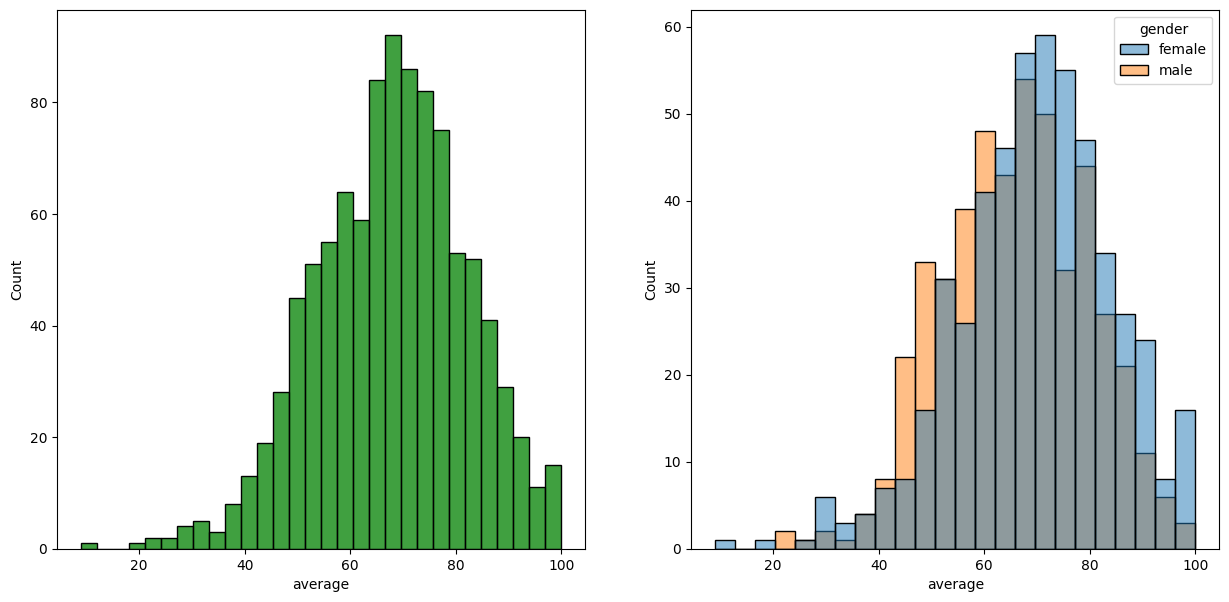

In [53]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='average',bins=30,color='g',ax=axs[0])
sns.histplot(data=df,x='average',hue='gender')
plt.show()

Insight:female students perform better than male students

In [54]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

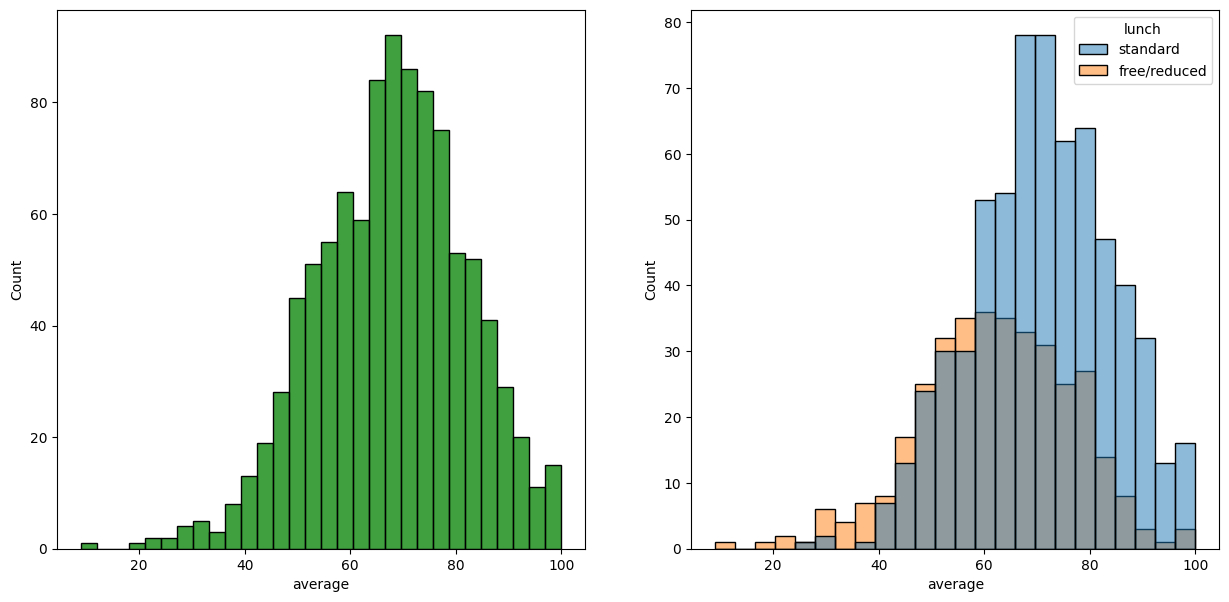

In [55]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='average',bins=30,color='g',ax=axs[0])
sns.histplot(data=df,x='average',hue='lunch')
plt.show()

In [63]:
ct_std=0
for l in df['lunch']:
    if l=='standard':
        ct_std+=1
print(ct_std)

645


ratio of standard to free:2 is to 1
still,at scores below 60 there are more free lunch students than standard.
at higher scores above 80,it can be clearly seen that ratio of students crosses 2 many times over, in favor of standard ones.

In [74]:
print(pa)

["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']


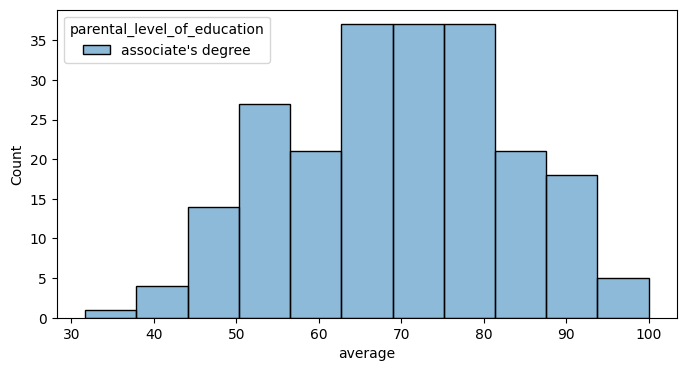

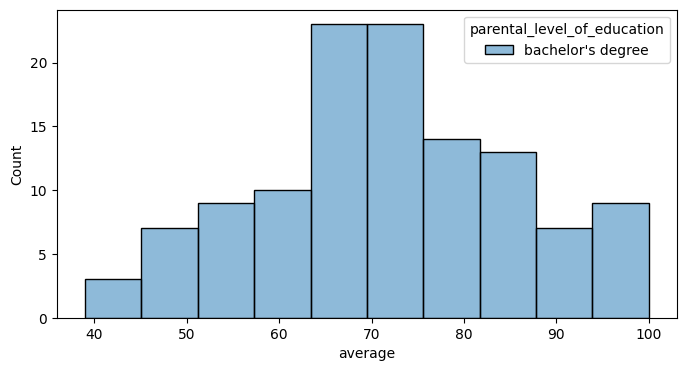

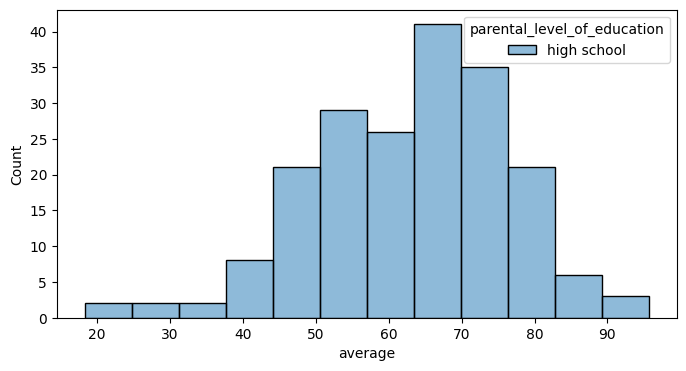

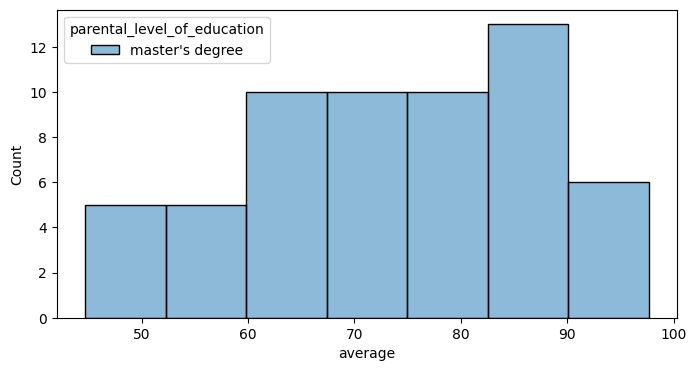

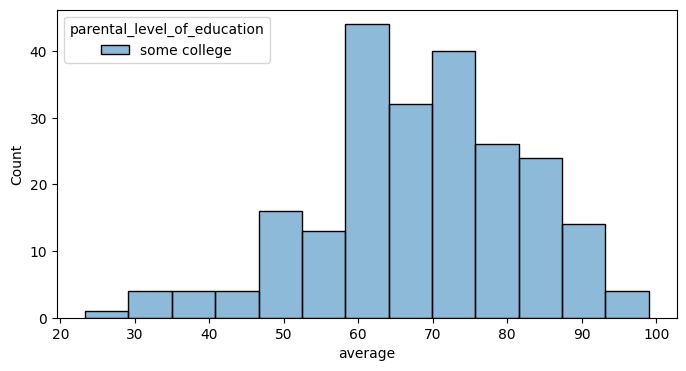

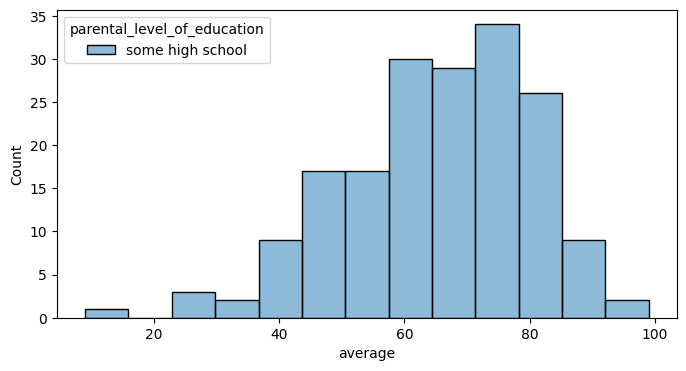

In [78]:

for i in range(6):
    plt.figure(figsize=(8,4))
    sns.histplot(data=df[df.parental_level_of_education==pa[i]],x='average',hue='parental_level_of_education')
    plt.show()

In [79]:

print(race_uniques)

['group A' 'group B' 'group C' 'group D' 'group E']


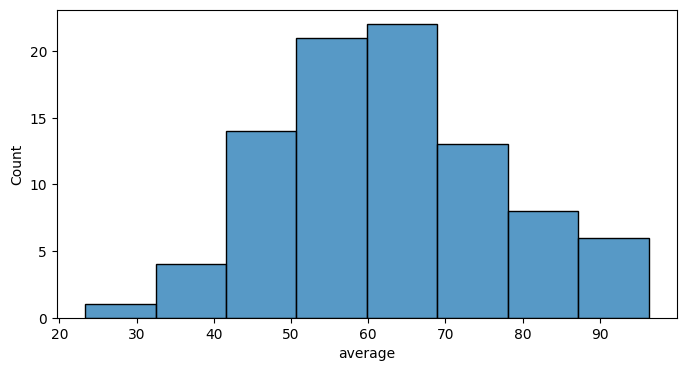

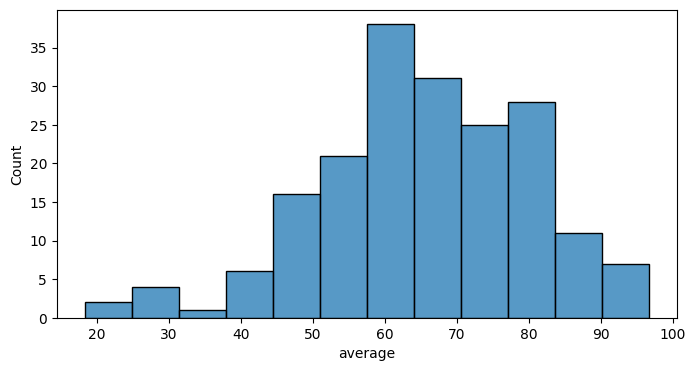

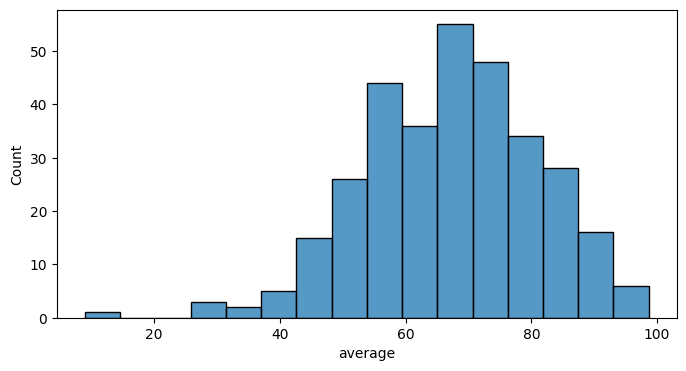

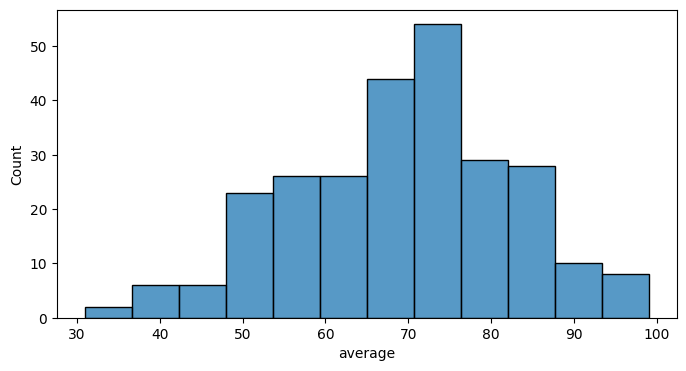

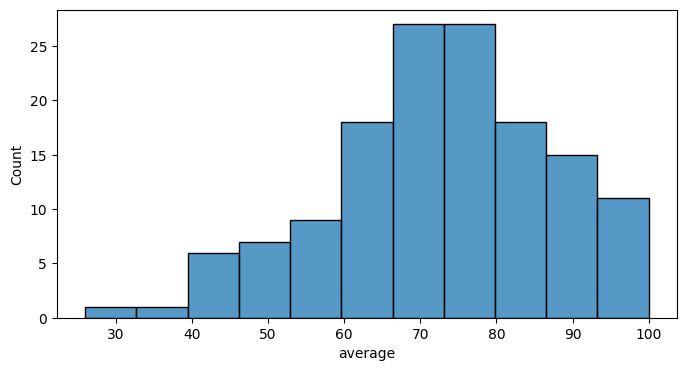

In [82]:

for i in range(5):
    plt.figure(figsize=(8,4))
    sns.histplot(data=df[df.race_ethnicity==race_uniques[i]],x='average')
    plt.show()

insight:students of ethnicity group a and group b perform poorly

In [84]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

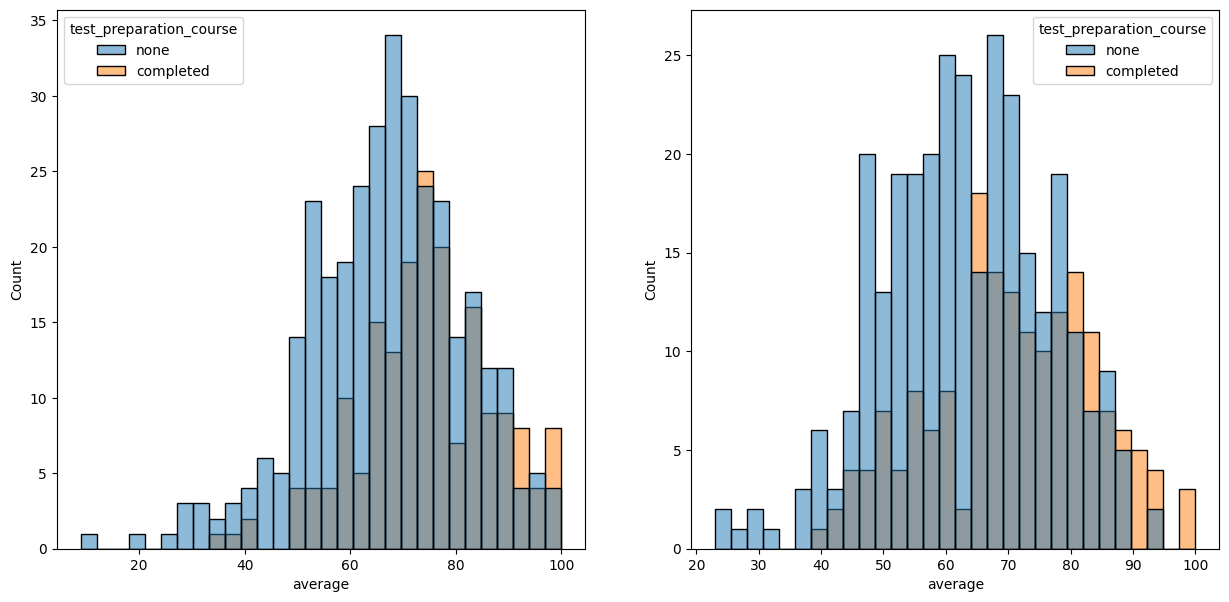

In [93]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,color='g',ax=axs[0],hue='test_preparation_course')
sns.histplot(data=df[df.gender=='male'],bins=30,x='average',hue='test_preparation_course')
plt.show()

insight:
we see that irrespective of gender,
not many people had taken the course 
very few female students who had taken the course performed bad .
A similar story can be seen for male students,though in case of male students,the ratio of course taken and bad performance to not taken and bad 
is higher than that for females
in both the genders it is seen that those who had taken the test preperation course,get much better marks.

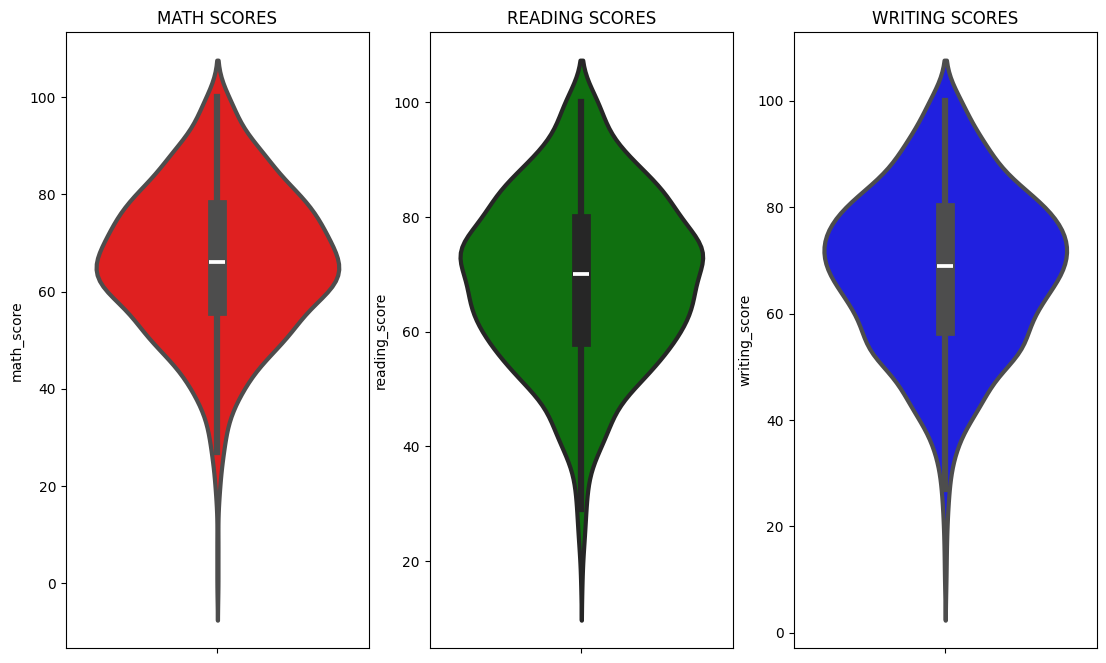

In [85]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

IQR for all is nearly 60 to 80
median for maths lies lower than the other two
reading score,shows tighter IOR,as depicted by whiskers

In [95]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

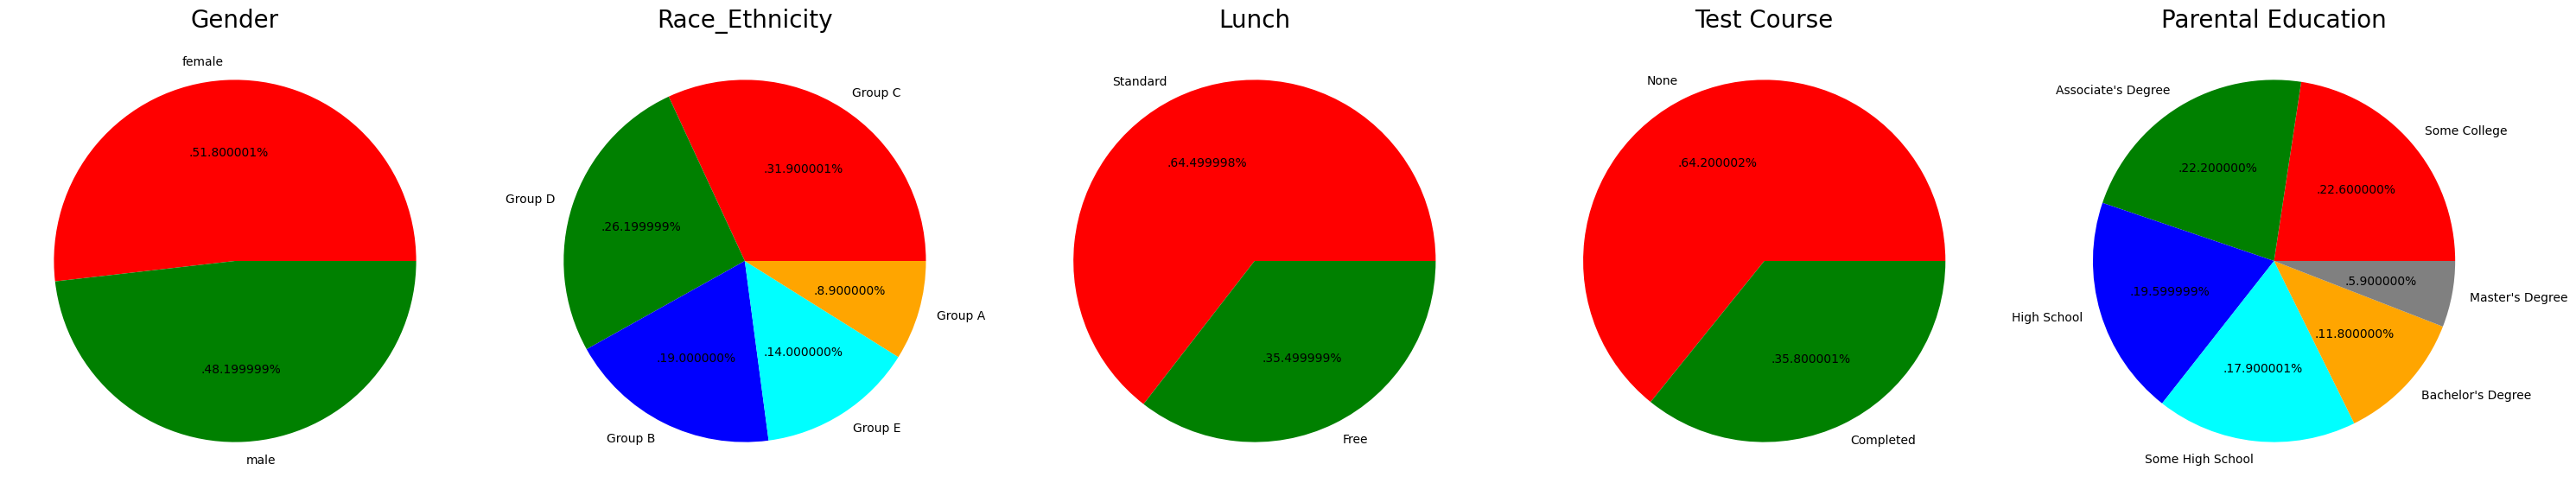

In [98]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

observation:
1)almost same number of males as females
2)most students belong to group c,followed by many belonging to d and then b.Only a few belong to group E,with the least falling into group A
3)twice as many students take standard lunches than free lunches
4)in the case of parental education,except for bachelors degree,and master's degree,most classes show the same percentages.these two show low,with least for mastres degree

bivariate analysis:
gender and performance,subject wise

In [99]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

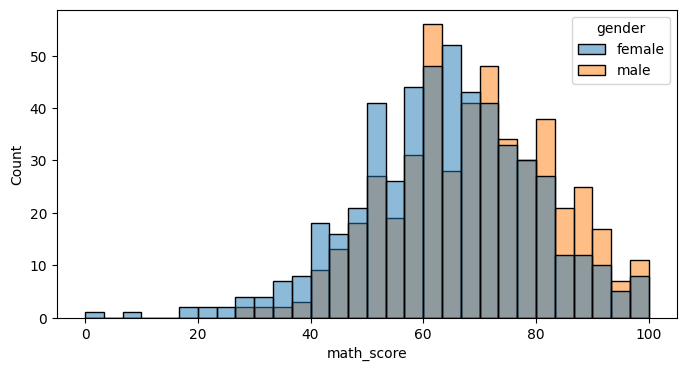

In [109]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='math_score',bins=30,color='g',hue='gender')
plt.show()
#subject wise comparision of s

in maths male students perform better

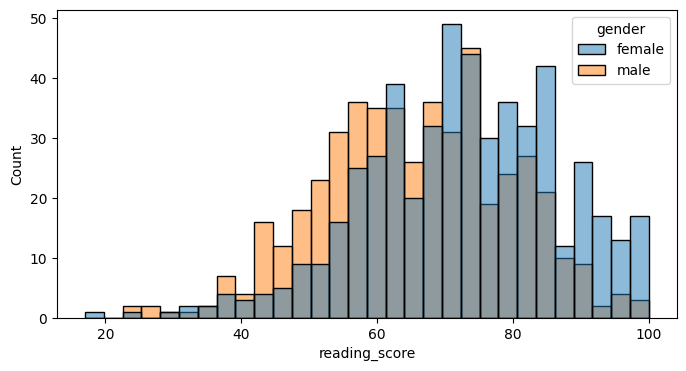

In [111]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='reading_score',bins=30,color='g',hue='gender')
plt.show()

in reading women perform far better

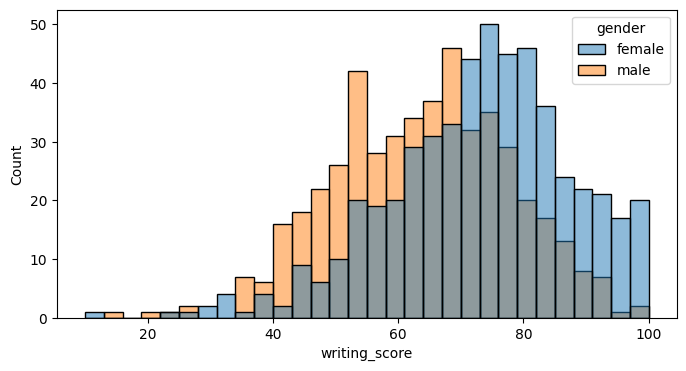

In [112]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='writing_score',bins=30,color='g',hue='gender')
plt.show()
#subject wise comparision of s

again,women far outperform men here

In [113]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

In [115]:
gender_group = df.groupby('gender')

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

IndexError: Column(s) average already selected

<Figure size 1000x800 with 0 Axes>